In [18]:
import pandas as pd  # For data manipulation and analysis, particularly for handling dataframes.
import numpy as np    # For numerical operations and working with arrays.   
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations in Python.
import seaborn as sns  # For making statistical graphics, built on top of matplotlib.
%matplotlib inline

In [19]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [20]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [21]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [22]:
##drop month,day and yyear
df.drop(['day','month','year'],axis=1,inplace=True)

In [23]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [24]:
df['Classes'].value_counts()

fire             131
not fire         100
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [25]:
## Encoding
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1) # Converting 'Classes' to 0 if it contains 'not fire', otherwise to 1

In [26]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
237,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
238,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
239,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
240,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
241,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [27]:
df['Classes'].value_counts() 

1    137
0    105
Name: Classes, dtype: int64

In [28]:
## Independent And dependent features
X=df.drop('FWI',axis=1) # Defining independent features by dropping the 'FWI' column from the dataframe
y=df['FWI'] # Defining the dependent feature as the 'FWI' column from the dataframe

In [32]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [33]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
237    6.5
238    0.0
239    0.2
240    0.7
241    0.5
Name: FWI, Length: 242, dtype: float64

In [36]:
#Train Test Split
from sklearn.model_selection import train_test_split # Importing the train_test_split function to split the dataset into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42) # Splitting the features (X) and target (y) into training (75%) and testing (25%) sets with a random seed of 42 for reproducibility
# The random_state parameter is like setting a specific seed for randomness. It makes sure that every time you split the data, you get the same result. This way, you can be sure your results are consistent and not just a fluke.

In [37]:
X_train.shape,X_test.shape # Displaying the shapes of the training and testing feature sets to show their dimensions

((181, 11), (61, 11))

In [38]:
## Feature Selection based on correlaltion
X_train.corr() # Calculating and displaying the correlation matrix for the training feature set to understand relationships between features

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.650346,-0.302105,-0.329711,0.703237,0.494261,0.377424,0.617606,0.466352,0.525551,0.249598
RH,-0.650346,1.000000,0.266525,0.234932,-0.634330,-0.413931,-0.246125,-0.693939,-0.364136,-0.435094,-0.364007
Ws,-0.302105,0.266525,1.000000,0.219681,-0.171843,0.000277,0.105115,0.005360,0.038701,-0.059470,-0.235477
Rain,-0.329711,0.234932,0.219681,1.000000,-0.546501,-0.286855,-0.300276,-0.346706,-0.297934,-0.386323,-0.065132
FFMC,0.703237,-0.634330,-0.171843,-0.546501,1.000000,0.621240,0.537884,0.751558,0.610780,0.780805,0.222702
DMC,0.494261,-0.413931,0.000277,-0.286855,0.621240,1.000000,0.876734,0.693404,0.983698,0.613507,0.196778
DC,0.377424,-0.246125,0.105115,-0.300276,0.537884,0.876734,1.000000,0.548992,0.946992,0.546427,-0.081403
ISI,0.617606,-0.693939,0.005360,-0.346706,0.751558,0.693404,0.548992,1.000000,0.659589,0.749722,0.266275
BUI,0.466352,-0.364136,0.038701,-0.297934,0.610780,0.983698,0.946992,0.659589,1.000000,0.609708,0.096607
Classes,0.525551,-0.435094,-0.059470,-0.386323,0.780805,0.613507,0.546427,0.749722,0.609708,1.000000,0.161852


<Axes: >

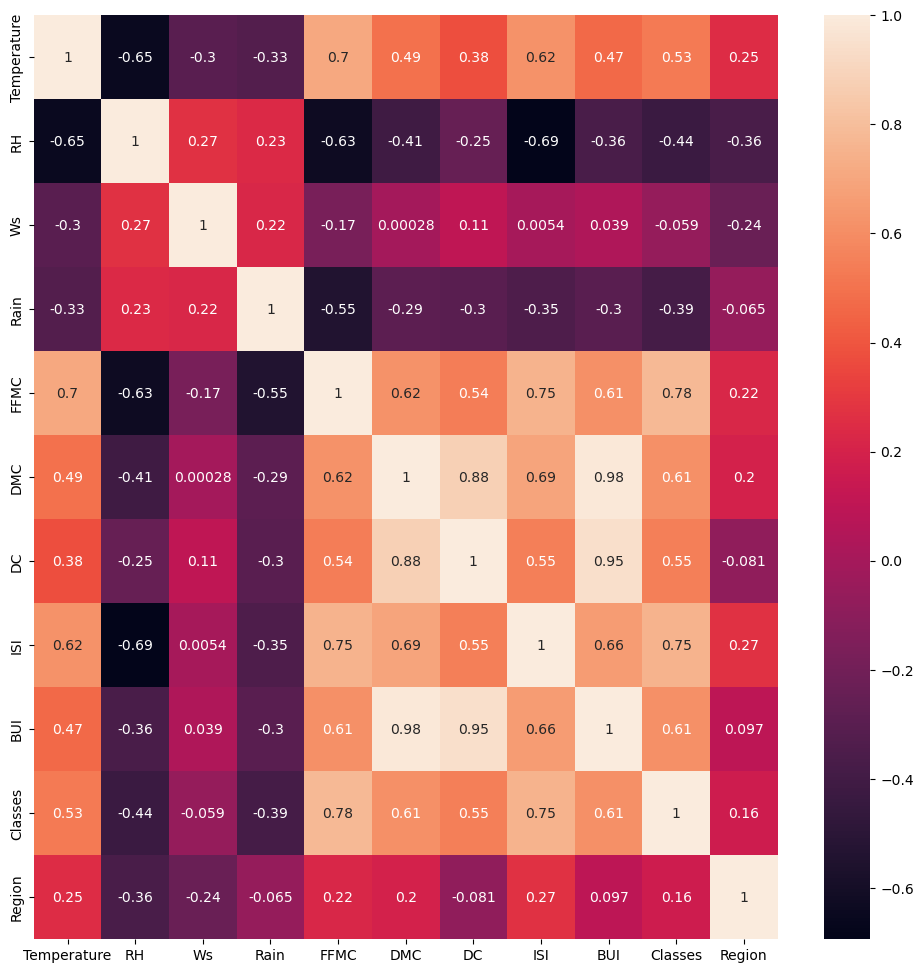

In [42]:
## Check for multicollinearity
plt.figure(figsize=(12,12)) # Setting the figure size to 12x12 inches
corr=X_train.corr() # Calculating the correlation matrix for the training feature set
sns.heatmap(corr,annot=True) # Creating a heatmap of the correlation matrix with annotations showing correlation values

In [43]:
def correlation(dataset, threshold):
    col_corr = set() # Initialize an empty set to hold names of highly correlated columns
    corr_matrix = dataset.corr() # Compute the correlation matrix of the dataset
    # Loop through the correlation matrix to find pairs of columns with high correlation
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # Check if the correlation is above the threshold , abs sees only the value irrespective of its sign
                colname = corr_matrix.columns[i]  # Get the name of the column
                col_corr.add(colname) # Add the column name to the set of correlated columns
    return col_corr # Return the set of highly correlated column names

In [ ]:
## threshold
corr_features=correlation(X_train,0.85) # Identifying columns in X_train that have a correlation greater than 0.85 with other columns , this can be changed according to the person training the model,i have taken 85%


In [54]:
# Dropping features from X_train and X_test that have a correlation greater than 0.85
X_train.drop(corr_features,axis=1,inplace=True) # Removing highly correlated features from the training set , (inplace=True) # Removes columns from the existing dataframe without creating a new one
X_test.drop(corr_features,axis=1,inplace=True) # Removing the same features from the testing set
X_train.shape,X_test.shape  # Displaying the shapes of the updated training and testing feature sets 

((181, 9), (61, 9))

# Feature Scaling Or Standardization


In [55]:
from sklearn.preprocessing import StandardScaler # Importing the StandardScaler for feature scaling
scaler=StandardScaler()  # Creating an instance of StandardScaler to standardize features
X_train_scaled=scaler.fit_transform(X_train) # Fitting the scaler on the training data and transforming it to have zero mean and unit variance ( standard form)
X_test_scaled=scaler.transform(X_test) # Transforming the test data using the same scaler (without fitting) to ensure consistent scaling

In [56]:
X_train_scaled

array([[-0.82836812,  0.75305576,  1.27406033, ..., -0.60658617,
        -1.07459849, -0.98356052],
       [-0.02800533, -0.52331623, -0.52192814, ...,  0.08124507,
         0.93058013,  1.01671425],
       [-0.82836812, -1.46380085, -2.67711431, ..., -0.46427625,
         0.93058013,  1.01671425],
       ...,
       [-1.89551851,  0.88741071,  0.55566494, ..., -1.05723422,
        -1.07459849, -0.98356052],
       [ 1.03914506, -0.45613875,  0.19646725, ...,  0.84023126,
         0.93058013,  1.01671425],
       [-0.56158052,  0.95458818,  1.99245572, ..., -0.84376935,
        -1.07459849, -0.98356052]])

In [ ]:
# box plots to understand effect of of standard scalar

C:\Users\nipun\AppData\Local\Temp\ipykernel_23268\160744393.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

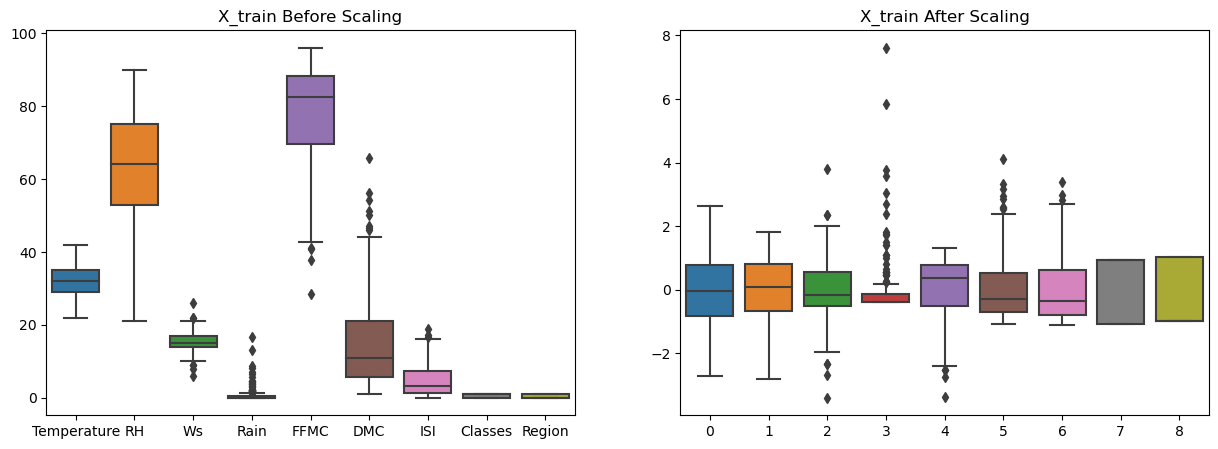

In [57]:
plt.subplots(figsize=(15, 5)) # Setting up a figure with a size of 15x5 inches
plt.subplot(1, 2, 1) # Creating the first subplot in a 1x2 grid
sns.boxplot(data=X_train) # Creating a boxplot for X_train before scaling
plt.title('X_train Before Scaling') # Adding a title to the first subplot
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

# Linear Regression Model

Mean absolute error 0.5838063599546962
R2 Score 0.983523052949508


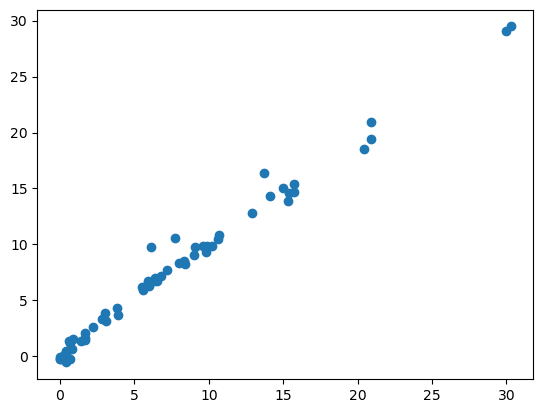

In [60]:
from sklearn.linear_model import LinearRegression # Importing the LinearRegression model
from sklearn.metrics import mean_absolute_error # Importing metrics for model evaluation
from sklearn.metrics import r2_score
linreg=LinearRegression() # Creating an instance of LinearRegression
linreg.fit(X_train_scaled,y_train) # Fitting the model to the scaled training data
y_pred=linreg.predict(X_test_scaled) # Predicting values for the scaled test data.
mae=mean_absolute_error(y_test,y_pred) # Calculating the mean absolute error of the predictions
score=r2_score(y_test,y_pred) # Calculating the R-squared score of the predictions
print("Mean absolute error", mae) # Printing the mean absolute error
print("R2 Score", score)
plt.scatter(y_test,y_pred)

## Lasso Regression

Mean absolute error 1.145997996939169
R2 Score 0.9497712193501187


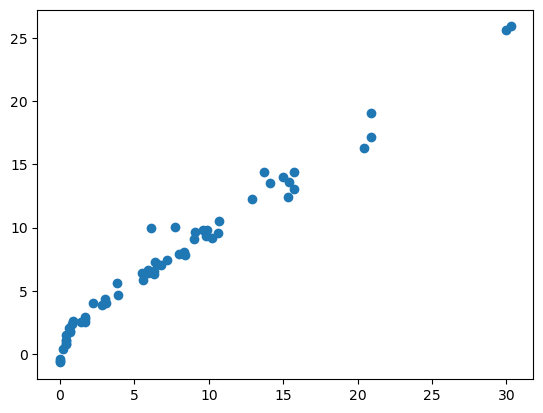

In [62]:
from sklearn.linear_model import Lasso # Importing the Lasso regression model
from sklearn.metrics import mean_absolute_error # Importing metrics for model evaluation
from sklearn.metrics import r2_score
lasso=Lasso()  # Creating an instance of Lasso regression
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

### Cross Validation Lasso

In [63]:
from sklearn.linear_model import LassoCV # Importing the LassoCV model for Lasso regression with cross-validation
lassocv=LassoCV(cv=5) # Creating an instance of LassoCV with 5-fold cross-validation
lassocv.fit(X_train_scaled,y_train)  # Fitting the LassoCV model to the scaled training data

LassoCV(cv=5)

In [64]:
lassocv.alpha_ # Displaying the best alpha value (regularization parameter) determined by LassoCV

0.06481103951672906

In [65]:
lassocv.alphas_ # Displaying all the alpha values tested by LassoCV during cross-validation

array([6.94947533, 6.48110395, 6.04429924, 5.6369337 , 5.25702323,
       4.90271746, 4.57229071, 4.26413362, 3.97674529, 3.70872596,
       3.45877025, 3.22566071, 3.00826197, 2.80551518, 2.61643285,
       2.44009403, 2.27563986, 2.12226935, 1.9792355 , 1.84584165,
       1.7214381 , 1.60541894, 1.49721907, 1.39631152, 1.3022048 ,
       1.21444055, 1.13259132, 1.05625846, 0.98507017, 0.91867974,
       0.8567638 , 0.79902079, 0.74516946, 0.69494753, 0.6481104 ,
       0.60442992, 0.56369337, 0.52570232, 0.49027175, 0.45722907,
       0.42641336, 0.39767453, 0.3708726 , 0.34587702, 0.32256607,
       0.3008262 , 0.28055152, 0.26164329, 0.2440094 , 0.22756399,
       0.21222694, 0.19792355, 0.18458417, 0.17214381, 0.16054189,
       0.14972191, 0.13963115, 0.13022048, 0.12144406, 0.11325913,
       0.10562585, 0.09850702, 0.09186797, 0.08567638, 0.07990208,
       0.07451695, 0.06949475, 0.06481104, 0.06044299, 0.05636934,
       0.05257023, 0.04902717, 0.04572291, 0.04264134, 0.03976

In [66]:
lassocv.mse_path_ # Displaying the mean squared error (MSE) for each alpha value tested during cross-validation

array([[54.83966454, 59.07855795, 38.72729712, 78.24916791, 53.00661707],
       [48.33127443, 52.98238939, 33.40705056, 76.17370919, 47.37592787],
       [42.489492  , 46.9476325 , 28.61641869, 69.11179183, 42.46600092],
       [37.38816074, 41.6222327 , 24.54198449, 62.88571919, 38.18380814],
       [32.93231013, 36.95463498, 21.08421335, 57.39228141, 33.53847098],
       [29.03908563, 32.86149181, 18.15701813, 52.54133041, 29.14966015],
       [25.63631212, 29.27011099, 15.68586523, 48.25410422, 25.34331445],
       [22.66140204, 26.11749884, 13.60632992, 43.16468118, 22.0425561 ],
       [20.05957707, 23.34834079, 11.86266757, 37.9874641 , 19.18168383],
       [17.78321296, 20.91452315, 10.40680285, 33.46741145, 16.70233718],
       [15.79082322, 18.77407566,  9.19714128, 29.52048402, 14.5542223 ],
       [14.0461701 , 16.89025254,  8.19780164, 26.07233474, 12.69363691],
       [12.51796119, 15.23137028,  7.37783328, 23.06047803, 11.08260866],
       [11.17864417, 13.76938633,  6.7

Mean absolute error 0.6701641696301907
R2 Score 0.9808648686248684


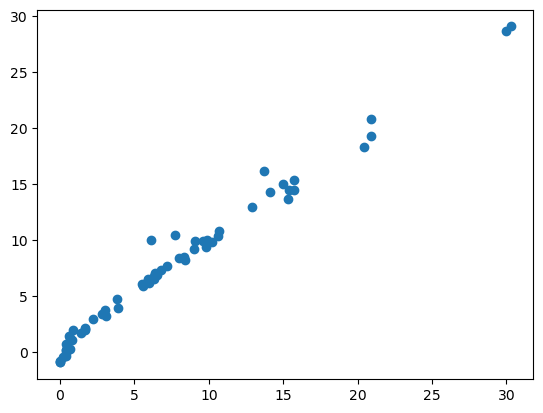

In [67]:
y_pred=lassocv.predict(X_test_scaled) # Predicting values for the scaled test data using the best Lasso model found by LassoCV
plt.scatter(y_test,y_pred)  # Creating a scatter plot of actual vs. predicted values
mae=mean_absolute_error(y_test,y_pred)  # Calculating the mean absolute error of the predictions
score=r2_score(y_test,y_pred) # Calculating the R-squared score of the predictions
print("Mean absolute error", mae)
print("R2 Score", score)

## Ridge Regression Model

Mean absolute error 0.6125515638101013
R2 Score 0.982698355229298


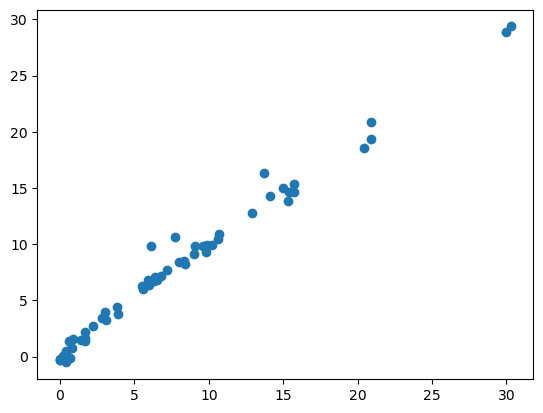

In [68]:
from sklearn.linear_model import Ridge # Importing the Ridge regression model
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train) # Fitting the Ridge model to the scaled training data
y_pred=ridge.predict(X_test_scaled) # Predicting values for the scaled test data.
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)


Mean absolute error 0.8566908888843255
R2 Score 0.972992811439674


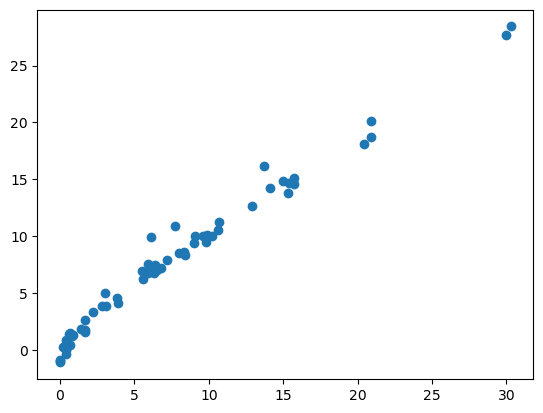

In [69]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [70]:
ridgecv.get_params() # Displaying the parameters and their current values for the RidgeCV model

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

## Elasticnet Regression

Mean absolute error 1.8915134363047037
R2 Score 0.8731354681001338


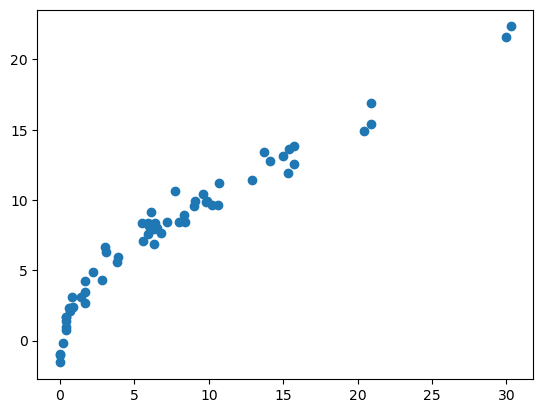

In [71]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.7295307419548663
R2 Score 0.9789324233433637


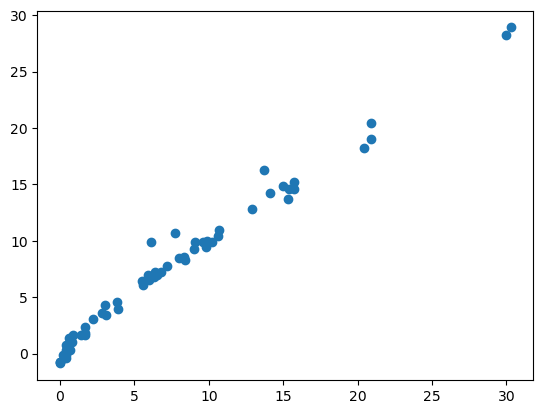

In [72]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [73]:
elasticcv.alphas_

array([1.38989507e+01, 1.29622079e+01, 1.20885985e+01, 1.12738674e+01,
       1.05140465e+01, 9.80543492e+00, 9.14458143e+00, 8.52826724e+00,
       7.95349058e+00, 7.41745193e+00, 6.91754050e+00, 6.45132142e+00,
       6.01652395e+00, 5.61103037e+00, 5.23286570e+00, 4.88018807e+00,
       4.55127972e+00, 4.24453870e+00, 3.95847100e+00, 3.69168330e+00,
       3.44287621e+00, 3.21083787e+00, 2.99443815e+00, 2.79262304e+00,
       2.60440959e+00, 2.42888110e+00, 2.26518264e+00, 2.11251691e+00,
       1.97014035e+00, 1.83735948e+00, 1.71352760e+00, 1.59804157e+00,
       1.49033892e+00, 1.38989507e+00, 1.29622079e+00, 1.20885985e+00,
       1.12738674e+00, 1.05140465e+00, 9.80543492e-01, 9.14458143e-01,
       8.52826724e-01, 7.95349058e-01, 7.41745193e-01, 6.91754050e-01,
       6.45132142e-01, 6.01652395e-01, 5.61103037e-01, 5.23286570e-01,
       4.88018807e-01, 4.55127972e-01, 4.24453870e-01, 3.95847100e-01,
       3.69168330e-01, 3.44287621e-01, 3.21083787e-01, 2.99443815e-01,
      

## Pickle the machine learning models,preprocessing model standard scalar 

In [75]:
scaler

StandardScaler()

In [76]:
ridge

Ridge()

In [ ]:
import pickle  # Importing the pickle module for saving objects to files
pickle.dump(scalar,open('scaler.pkl','wb')) # Saving the StandardScaler instance to a file named 'scaler.pkl'
pickle.dump(ridge,open('ridge.pkl','wb'))  # Saving the Ridge regression model to a file named 'ridge.pkl'